# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [1]:
#import libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from random import seed,sample


In [2]:
# Your code here
data = pd.read_csv("money_fraud.csv") 
data.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

In [3]:
#explore the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
data.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
50%      1.327057e+05    2.146614e+05  0.000000e+00    0.000000e+00  
75%      9.430367e+05    1.111909e+06  0.000000e+00    0.000000e+00  
max      3.560159e+08    3.561793e+08  1.000000e+00    1.000000e+00

### What is the distribution of the outcome? 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C19D09A3C8>,
      dtype=object)

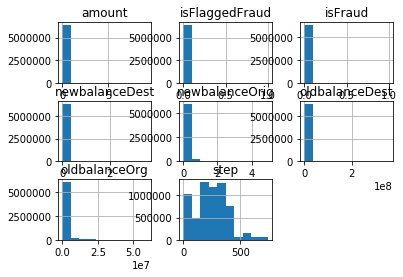

In [5]:
# Your response here
data.hist()

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [6]:
# Your code here
#Changing the type values into integer for doing regression
data['type'].value_counts()
data_dummy = pd.get_dummies(data['type'],drop_first=True)
data = data.merge(data_dummy,left_index=True, right_index=True)
#drop type column since we have changed it into ordinal value
#also drop nameOrig and nameDest as it is not to be used
data.drop(data[['nameOrig','nameDest']],inplace=True,axis = 1)
data.drop(['type'],inplace = True, axis = 1)
data.head()

step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   9839.64       170136.0       160296.36             0.0   
1     1   1864.28        21249.0        19384.72             0.0   
2     1    181.00          181.0            0.00             0.0   
3     1    181.00          181.0            0.00         21182.0   
4     1  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  CASH_OUT  DEBIT  PAYMENT  TRANSFER  
0             0.0        0               0         0      0        1         0  
1             0.0        0               0         0      0        1         0  
2             0.0        1               0         0      0        0         1  
3             0.0        1               0         1      0        0         0  
4             0.0        0               0         0      0        1         0

### Run a logisitc regression classifier and evaluate its accuracy.

In [7]:
# Your code here
#import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score
#split data
X = data.loc[:,data.columns !='isFraud']
y = data['isFraud']
#split further into train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
#fit model
data_model = LogisticRegression()
data_model.fit(X_train,y_train)

#make predictions on test and check accuracy
y_pred = data_model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

print('The accuracy score:',acc)
print('f1 score:',f1)
print('recall score: ',recall)

The accuracy score: 0.9982074994263369
f1 score: 0.3789817587802885
recall score:  0.41952983725135623


### Now pick a model of your choice and evaluate its accuracy.

In [8]:
# Your code here
from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

acc2 = accuracy_score(y_test, rfc_pred)
f12 =  f1_score(y_test, rfc_pred)
recall2 = recall_score(y_test, rfc_pred)

print('Accuracy =  ',acc2)
print('f1 score = ',f12)
print('recall score =  ',recall2)

Accuracy =   0.9996715189654576
f1 score =  0.858974358974359
recall score =   0.7673297166968053


### Which model worked better and how do you know?

In [9]:
# Your response here
"""
Random Forest classifier works better as we can see the accuracy is slightly better with better f1_score and recall scor
But it may so happen because of overfitting or so.
"""